In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import pylab
from pylab import rcParams

In [2]:
df_blocking_01 = pd.read_csv('../20181209_processing_time_5node_01/result.csv', names = ('load', 'Without defragmentation', 'Conventional', 'Proposed', 'Conventional with SSR-LNO', 'Proposed with SSRR-LNO') )
df_blocking_02 = pd.read_csv('../20181209_processing_time_5node_02/result.csv', names = ('load', 'Without defragmentation', 'Conventional', 'Proposed', 'Conventional with SSR-LNO', 'Proposed with SSRR-LNO') )
df_blocking_05 = pd.read_csv('../20181209_processing_time_5node_05/result.csv', names = ('load', 'Without defragmentation', 'Conventional', 'Proposed', 'Conventional with SSR-LNO', 'Proposed with SSRR-LNO') )
df_blocking_1  = pd.read_csv('../20181209_processing_time_5node_1/result.csv',  names = ('load', 'Without defragmentation', 'Conventional', 'Proposed', 'Conventional with SSR-LNO', 'Proposed with SSRR-LNO') )

In [3]:
for index, row in df_blocking_01.iterrows():
    df_blocking_01.loc[index, 'Without defragmentation':'Proposed with SSRR-LNO'] /= [10000, 10000, 10000, 10000, 10000]
for index, row in df_blocking_02.iterrows():
    df_blocking_02.loc[index, 'Without defragmentation':'Proposed with SSRR-LNO'] /= [10000, 10000, 10000, 10000, 10000]
for index, row in df_blocking_05.iterrows():
    df_blocking_05.loc[index, 'Without defragmentation':'Proposed with SSRR-LNO'] /= [10000, 10000, 10000, 10000, 10000]
for index, row in df_blocking_1.iterrows():
    df_blocking_1.loc[index, 'Without defragmentation':'Proposed with SSRR-LNO'] /= [10000, 10000, 10000, 10000, 10000]

In [4]:
df_blocking_01 = df_blocking_01.replace(0, np.nan)
df_blocking_02 = df_blocking_02.replace(0, np.nan)
df_blocking_05 = df_blocking_05.replace(0, np.nan)
df_blocking_1 = df_blocking_1.replace(0, np.nan)

In [5]:
print(pd.concat([df_blocking_02.loc[:, ['load', 'Without defragmentation' , 'Conventional', 'Proposed']], df_blocking_05.loc[:, [ 'Conventional', 'Proposed']], df_blocking_1.loc[:, [ 'Conventional', 'Proposed']]], axis=1))

   load  Without defragmentation  Conventional  Proposed  Conventional  \
0    60                   0.0020           NaN       NaN        0.0009   
1    70                   0.0121        0.0007    0.0009        0.0057   
2    80                   0.0393        0.0057    0.0070        0.0283   
3    90                   0.0708        0.0193    0.0203        0.0570   
4   100                   0.1126        0.0482    0.0507        0.0942   
5   110                   0.1471        0.0856    0.0861        0.1292   
6   120                   0.1745        0.1132    0.1144        0.1582   
7   130                   0.2136        0.1532    0.1553        0.1948   
8   140                   0.2382        0.1837    0.1844        0.2166   
9   150                   0.2675        0.2194    0.2194        0.2521   

   Proposed  Conventional  Proposed  
0    0.0005        0.0015    0.0013  
1    0.0037        0.0081    0.0082  
2    0.0213        0.0327    0.0318  
3    0.0497        0.0637    0.06

In [8]:
plt.clf()
pylab.figure(figsize=(7, 7))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')
plt.rcParams['font.family'] ='Times New Roman'
plt.rcParams['font.weight'] = 'light'
plt.rcParams['font.size'] = 22
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.borderaxespad'] = 0
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['savefig.bbox'] = 'tight'

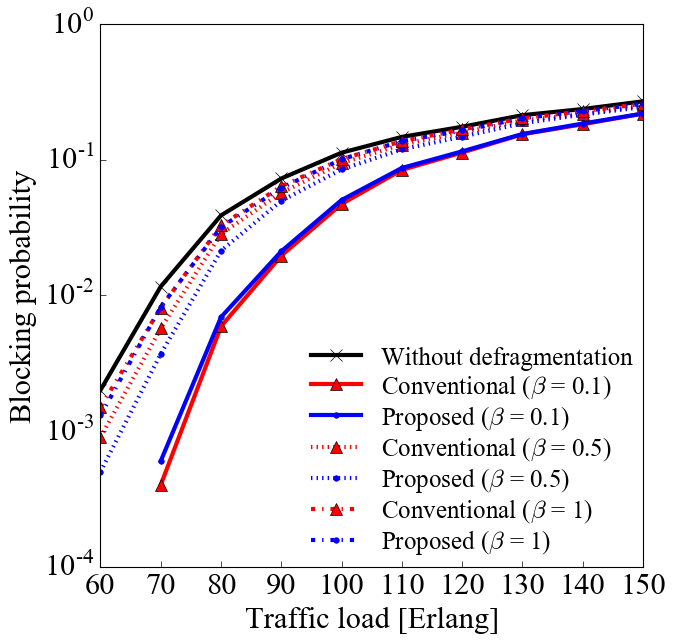

In [9]:
plt.yscale("log")
plt.minorticks_off()
plt.plot(df_blocking_01['load'], df_blocking_01['Without defragmentation'], marker='x',  color="black")

plt.plot(df_blocking_01['load'], df_blocking_01['Conventional'], label=('Conventional (' + r'$\beta$' + ' = 0.1)'), marker='^',  color="red")
plt.plot(df_blocking_01['load'], df_blocking_01['Proposed'], label=('Proposed (' + r'$\beta$' + ' = 0.1)'), marker='.',  color="blue")

# plt.plot(df_blocking_02['load'], df_blocking_02['Conventional'], label=('Conventional (' + r'$\beta$' + ' = 0.2)'), marker='^',  color="red")
# plt.plot(df_blocking_02['load'], df_blocking_02['Proposed'], label=('Proposed (' + r'$\beta$' + ' = 0.2)'), marker='.',  color="blue")

plt.plot(df_blocking_05['load'], df_blocking_05['Conventional'], label=('Conventional (' + r'$\beta$' + ' = 0.5)'), marker='^',  color="red", linestyle=':')
plt.plot(df_blocking_05['load'], df_blocking_05['Proposed'], label=('Proposed (' + r'$\beta$' + ' = 0.5)'), marker='.',  color="blue", linestyle=':')

plt.plot(df_blocking_1['load'], df_blocking_1['Conventional'], label=('Conventional (' + r'$\beta$' + ' = 1)'), marker='^',  color="red", linestyle='-.')
plt.plot(df_blocking_1['load'], df_blocking_1['Proposed'], label=('Proposed (' + r'$\beta$' + ' = 1)'), marker='.',  color="blue", linestyle='-.')

plt.yticks([1,0.1, 0.01,0.001, 0.0001])

plt.xlabel("Traffic load [Erlang]") # x軸のタイトル
plt.ylabel("Blocking probability") # y軸
plt.legend(loc="lower right")

plt.savefig("../../sawa_paper/sawa/20181101_journal_sawa/fig/speeding_net5.pdf")
plt.show()
plt.close()